# Single Particle Simulation Example

<table><tr>
<td> <img src="SolidBodyRotation.gif" alt="Drawing" style="width: 400px;"/> </td>
<td> <img src="ConvergingSpiral.gif" alt="Drawing" style="width: 400px;"/> </td>
</tr></table>

Here we simulate the trajectory of a particle drifting in an idealized flow which is a crude representation for an ocean eddy. 

To start, we use solid body rotation around a central point. Exercises are provided at the end (e.g. to add a convergence / divergence term). 

This demonstrated the use of differential equation solvers in Julia which are broadly applicable to many other problems.

- 1. setup the software and initialize example
- 2. simulate trajectories & plot results
- 3. experiment with parameters (user)

### For More Documentation 

On Julia :
- <https://julialang.org>
- <https://docs.julialang.org>

On this notebook :
- <https://docs.juliadiffeq.org/latest> 
- <https://en.wikipedia.org/wiki/Displacement_(vector)>
- <https://juliaclimate.github.io/IndividualDisplacements.jl/dev>
- <https://juliaclimate.github.io/MeshArrays.jl/dev>

## 1.1 Import Software

The following `Julia` Packages are used for solving differential equations and plotting results.

In [1]:
using OrdinaryDiffEq, Plots
using IndividualDisplacements, MeshArrays
include("helper_functions.jl")

SetupPeriodicDomain

## 1.2  Gridded Domain Example

The `SetPeriodicDomain` helper function sets up a basic grid of size `np x np`.

In [2]:
np=16
Γ=SetupPeriodicDomain(np);

In [3]:
#?SetupPeriodicDomain
#show(Γ["XC"])
#scatter(Γ["XC"][1],Γ["YC"][1],leg=:none,title="grid points")

## 1.3 Define Time Period & Velocity Fields

For convenience, at the end we store all parameters in `𝑃` (a dictionary). 

_Skipped in initial presentation mode_

In [4]:
#time range
t0=0.0
t1=0.98*2*pi
#t1=3.0*2*pi
𝑇 = (t0,t1)

#solid-body rotation around central location
i=Int(np/2+1)
u=-(Γ["YG"].-Γ["YG"][1][i,i])
v=(Γ["XG"].-Γ["XG"][1][i,i])

#add some convergence to / divergence from central location
d=0.0 
#d=-0.1
u=u+d*(Γ["XG"].-Γ["XG"][1][i,i])
v=v+d*(Γ["YG"].-Γ["YG"][1][i,i])

#store everything in a dictionnary
𝑃=Dict("u0" => u, "u1" => u, "v0" => v, "v1" => v, "t0" => t0, "t1" => t1)
𝑃=merge(𝑃,Γ)

Dict{Any,Any} with 22 entries:
  "hFacC" =>   name        = hFacC…
  "t0"    => 0.0
  "RAS"   =>   name        = RAS…
  "YC"    =>   name        = YC…
  "v1"    =>   data type   = Float64…
  "Depth" =>   name        = Depth…
  "RAC"   =>   name        = RAC…
  "RAZ"   =>   name        = RAZ…
  "u1"    =>   data type   = Float64…
  "XG"    =>   name        = XG…
  "hFacW" =>   name        = hFacW…
  "DYG"   =>   name        = DYG…
  "YG"    =>   name        = YG…
  "RAW"   =>   name        = RAW…
  "u0"    =>   data type   = Float64…
  "hFacS" =>   name        = hFacS…
  "t1"    => 6.15752
  "DXG"   =>   name        = DXG…
  "XC"    =>   name        = XC…
  "DXC"   =>   name        = DXC…
  "DYC"   =>   name        = DYC…
  "v0"    =>   data type   = Float64…

## 1.4 Define initial position and time period

In [5]:
u0=np*[1/3,1/3]
du=fill(0.0,2);

## 2.1 solve for particle trajectory

- `ODEProblem` formulates the differential equation along with the time period `𝑇`, parameters `𝑃`
- `solve` then performs the integration over `𝑇`, starting from `u0`, using the `Tsit5` solver

_Tsit5 - Tsitouras 5/4 Runge-Kutta method. (free 4th order interpolant)._ ([from the docs](https://docs.sciml.ai/dev/solvers/ode_solve/#))

_Interested in additional documentation? Try `?ODEProblem` or `?solve`_

In [6]:
prob = ODEProblem(⬡,u0,𝑇,𝑃)
sol = solve(prob,Tsit5(),reltol=1e-8);

## 2.2 Post-Process Output

_(Not much in the case of this example)_

In [7]:
x,y=sol[1,:],sol[2,:]
nt=length(x)

301

## 2.3 plot result (particle trajectory)

- define `myplot` convenience function
- generate animation using `myplot`

In [8]:
myplot(i)=plot(x[1:i],y[1:i],linewidth=2,arrow = 2,
    title="Solid body rotation / Spiral example",leg=false,
    xaxis="x",yaxis="y",xlims=(0,np),ylims=(0,np))

myplot (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /var/folders/1m/ddjxkwvn7bz7z9shdnh8q3040000gn/T/SolidBodyRotation.gif
└ @ Plots /Users/gforget/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/var/folders/1m/ddjxkwvn7bz7z9shdnh8q3040000gn/T/SolidBodyRotation.gif")
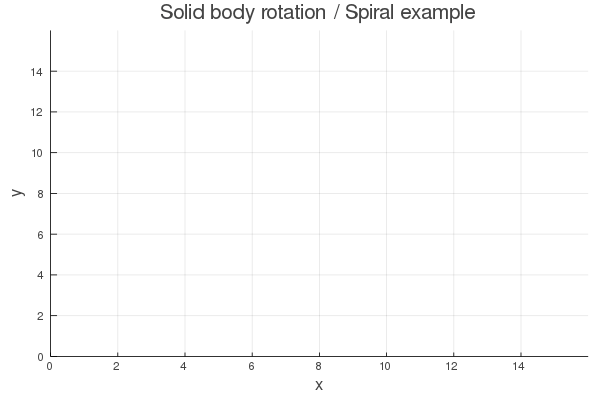

In [9]:
p=Int(ceil(nt/100))
anim = @animate for i ∈ 1:p:nt
    myplot(i)
end
pth=tempdir()*"/"
gif(anim, pth*"SolidBodyRotation.gif", fps = 15)

### Want a single plot?

Try uncommenting one line at a time in the next cell below.

In [10]:
#plt=myplot(nt)
#scatter!(plt,[u0[1]],[u0[2]])
#savefig(plt,pth*"SolidBodyRotation.png")

### Want to change other parameters?

Try uncommenting, in the code above, these lines:

- `#?SetupPeriodicDomain`
- `#show(Γ["XC"])`
- `#t1=3.0*2*pi`
- `#d=-0.1`